In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [5]:
#print(load_boston()['DESCR'])

In [9]:
data.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677082   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

#### По основным статистическим показателям аномалий и выбросов не видно. Подозрительные параметры, которые нужно иссследовать: CRIM, ZN, B. По смыслу все параметры могут оказывать влияние на медианную величину показателя MEDV

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Пустот тоже нет

#### Посмотрим на подозрительный колонки графичкски

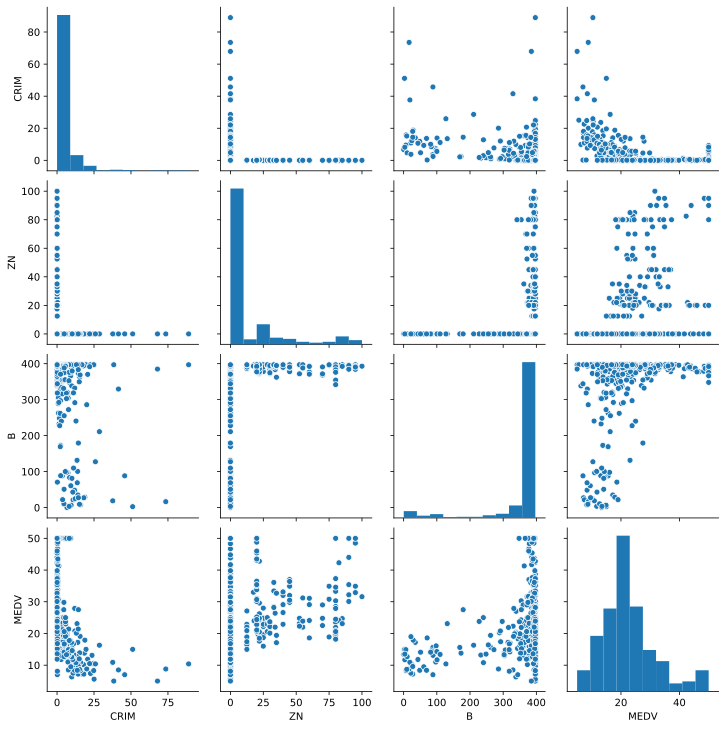

In [24]:
sns.pairplot(data[['CRIM','ZN','B','MEDV']]);


#### По пораметру CRIM видно, что после значения 25 есть несколько показаний выше этого порога. Но разброс по стоимости не велик, поэтому можно все значения выше 25 приравнять к 30. 

#### По параметру ZN выбросов не наблюдается. Разве что для значения ZN=25 есть подозрительно аномальные наблюдения где MEDV>40. Это поведение надо обсуждат с держателями видения предметной области.

#### По параметру B выпадающие значения коррелируют с MEDV. Для весов по выпадающим значениям B может имеет смысл, сначения B [0:200] приравнять к 200.  

##### Остальные пары

In [34]:
sns.pairplot(data[data.columns.difference(['CRIM','ZN','B'])]);

#### Проглядывается отличная зависимость MEDV с LSTAT

##### Делим выборку на тренировочную и тестовую

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['MEDV'])], data['MEDV'], test_size=0.2, random_state=30)

##### Обучаем модель линейной регресии на тренировочных данных. И проверяем на тестовых.

In [55]:
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MEDV.mean: {}'.format(data[['MEDV']].mean()))

Weights: [ 5.71160169e-03  7.35729616e-03  3.24554801e+00 -1.10214967e-01
 -1.52545323e+00  1.80366661e-02 -5.61078681e-01 -1.87109384e+01
 -9.77173081e-01  3.21188947e-01  3.74450628e+00 -1.33423934e-02
  4.10654046e-02]
Bias: 39.08458849571474
Error: 3.2254104069763274
MEDV.mean: MEDV    22.532806
dtype: float64


In [58]:
data[data.columns.difference(['MEDV'])].columns

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['MEDV','AGE','B','DIS','TAX','ZN'])], data['MEDV'], test_size=0.2, random_state=30)
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('MEDV.mean: {}'.format(data[['MEDV']].mean()))

Weights: [ 4.0108425  -0.08776219  0.03774771 -0.57143091 -5.28545414 -0.99675115
  0.08776105  4.39440432]
Bias: 22.17815429487853
Error: 3.2254104069763274
MEDV.mean: MEDV    22.532806
dtype: float64


In [61]:
data.shape

(506, 14)

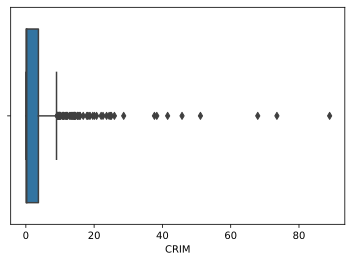

In [64]:
ax = sns.boxplot(x=data['CRIM'])

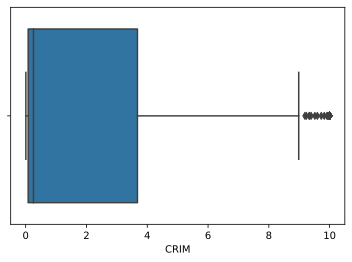

In [75]:
data['CRIM'] = data['CRIM'].apply(lambda rt:30 if rt>25 else rt)
ax = sns.boxplot(x=dt)

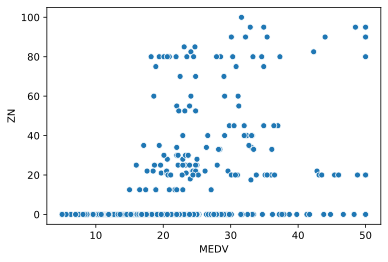

In [103]:
ax = sns.scatterplot(x="MEDV", y="ZN",data=data)

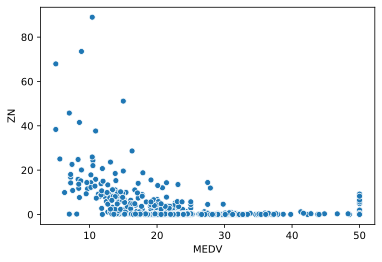

In [104]:
data['ZN'] = data[~((data['ZN']==20) & (data['MEDV']>40))]
ax = sns.scatterplot(x="MEDV", y="ZN",data=data)